### Problem Statement
This data set includes descriptions of hypothetical samples corresponding to 23 species of gilled mushrooms in the Agaricus and Lepiota Family (pp. 500-525). Each species is identified as definitely edible, definitely poisonous, or of unknown edibility and not recommended. This latter class was combined with the poisonous one. Making a classification model predicting if the mushroom belongs to 'edible' or 'poisonous' class.

### Importing Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

#Importing Visualising Libraries
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(color_codes = True)
from IPython.display import Image
import scikitplot as skplt

#Importing DataCleaning Libraries
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split

#Importing Classification Models 
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

#Importing Classification Model Evaluation Metrics 
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report

#Importing Hyperparameter Tuning model
from sklearn.model_selection import RandomizedSearchCV

#Importing Serialization libraries
import joblib

In [2]:
#Loading Mushrooms Dataset
mushrooms = pd.read_csv('mushrooms.csv')
mushrooms.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


## About Dataset
It's a classification dataset which consists of all Categorical features.

#### dependent variable : 
- __Class__ : poisonous(p) and edible(e)

##### Independent Variables : 
- __cap shape__ : bell(b), Conical(c), Convex(x), flat(f), knobbed(k), sunken(s)
- __cap surface__: fibrous(f),grooves(g),scaly(y),smooth(s)
- __cap color__: brown(n),buff(b),cinnamon(c),gray(g),green(r), pink(p),purple(u),red(e),white(w),yellow(y)
- __bruises__: yes(t), no(f)
- __odor__ : almond(a),anise(l),creosote(c),fishy(y),foul(f), musty(m),none(n),pungent(p),spicy(s)
- __gill attachment__: attached(a),descending(d),free(f),notched(n)
- __gill-spacing__: close(c),crowded(w),distant(d)
- __gill-size__: broad(b),narrow(n)
- __gill-color__: black(k),brown(n),buff(b),chocolate(h),gray(g), green(r),orange(o),pink(p),purple(u),red(e), white(w),yellow(y)
- __stalk-shape__: enlarging(e),tapering(t)
- __stalk-root__: bulbous(b),club(c),cup(u),equal(e), rhizomorphs(z),rooted(r),missing=?
- __stalk-surface-above-ring__: fibrous(f),scaly(y),silky(k),smooth(s)
- __stalk-surface-below-ring__: fibrous(f),scaly(y),silky(k),smooth(s)
- __stalk-color-above-ring__: brown(n),buff(b),cinnamon(c),gray(g),orange(o), pink(p),red(e),white(w),yellow(y)
- __stalk-color-below-ring__: brown(n),buff(b),cinnamon(c),gray(g),orange(o), pink(p),red(e),white(w),yellow(y)
- __veil-type__: partial(p),universal(u)
- __veil-color__: brown(n),orange(o),white(w),yellow(y)
- __ring-number__: none(n),one(o),two(t)
- __ring-type__: cobwebby(c),evanescent(e),flaring(f),large(l), none(n),pendant(p),sheathing(s),zone(z)
- __spore-print-color__: black(k),brown(n),buff(b),chocolate(h),green(r), orange(o),purple(u),white(w),yellow(y)
- __population__: abundant(a),clustered(c),numerous(n), scattered(s),several(v),solitary(y)
- __habitat__: grasses(g),leaves(l),meadows(m),paths(p), urban(u),waste(w),woods(d)

In [3]:
#Checking dataset shape
mushrooms.shape

(8124, 23)

This dataset consists of 23 columns and 8124 rows

In [4]:
mushrooms.describe()
#As data consists of all categorical features there is no need to perform statistical analysis

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


<AxesSubplot:xlabel='class', ylabel='count'>

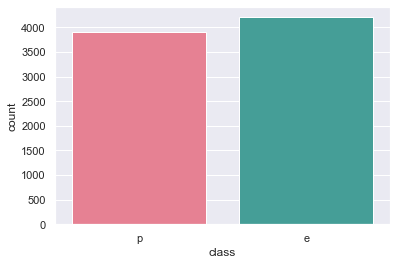

In [5]:
#Univariate Analysis
#Visualizing to check class imbalance
sns.countplot(mushrooms['class'], palette = 'husl')


There is no class imbalance in the given dataset.

In [6]:
# To check if there are any null values
mushrooms.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [7]:
#Checking if there are any duplicate records
mushrooms.duplicated().sum()

0

In [8]:
#Cross - Checking Datatype of features and for Null values
mushrooms.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [9]:
#Scrolling throught the Dataset I found ("?")datapoints in stalk-root column which is a misidentified category.  
Image(url= "Screenshot (80).jpg", width=400, height=400)

In [10]:
#As we can see there are total 2480 misidentified datapoints in stalk root column. 
mushrooms = mushrooms.replace({'?':np.NaN})
print(mushrooms.isna().sum())

class                          0
cap-shape                      0
cap-surface                    0
cap-color                      0
bruises                        0
odor                           0
gill-attachment                0
gill-spacing                   0
gill-size                      0
gill-color                     0
stalk-shape                    0
stalk-root                  2480
stalk-surface-above-ring       0
stalk-surface-below-ring       0
stalk-color-above-ring         0
stalk-color-below-ring         0
veil-type                      0
veil-color                     0
ring-number                    0
ring-type                      0
spore-print-color              0
population                     0
habitat                        0
dtype: int64


In [11]:
#We are replacing the ("?") with 'm' category in [stalk-root] column
# we are not dropping the datapoints as it would result in huge loss of valuable data (26% of total dataset)
mushrooms['stalk-root']  = mushrooms['stalk-root'].replace(np.NaN,'n')
mushrooms.isna().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

<AxesSubplot:xlabel='stalk-root', ylabel='count'>

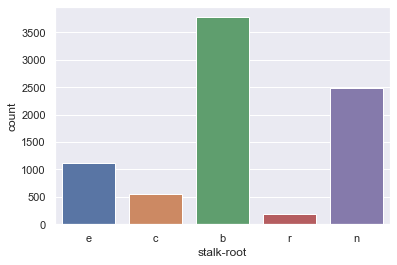

In [12]:
#Univariate Analysis
#as we can interpret 26% of datapoint in [stalk root was missing] and no consists of a new class n
mushrooms['stalk-root'].value_counts()
sns.countplot(mushrooms['stalk-root'])

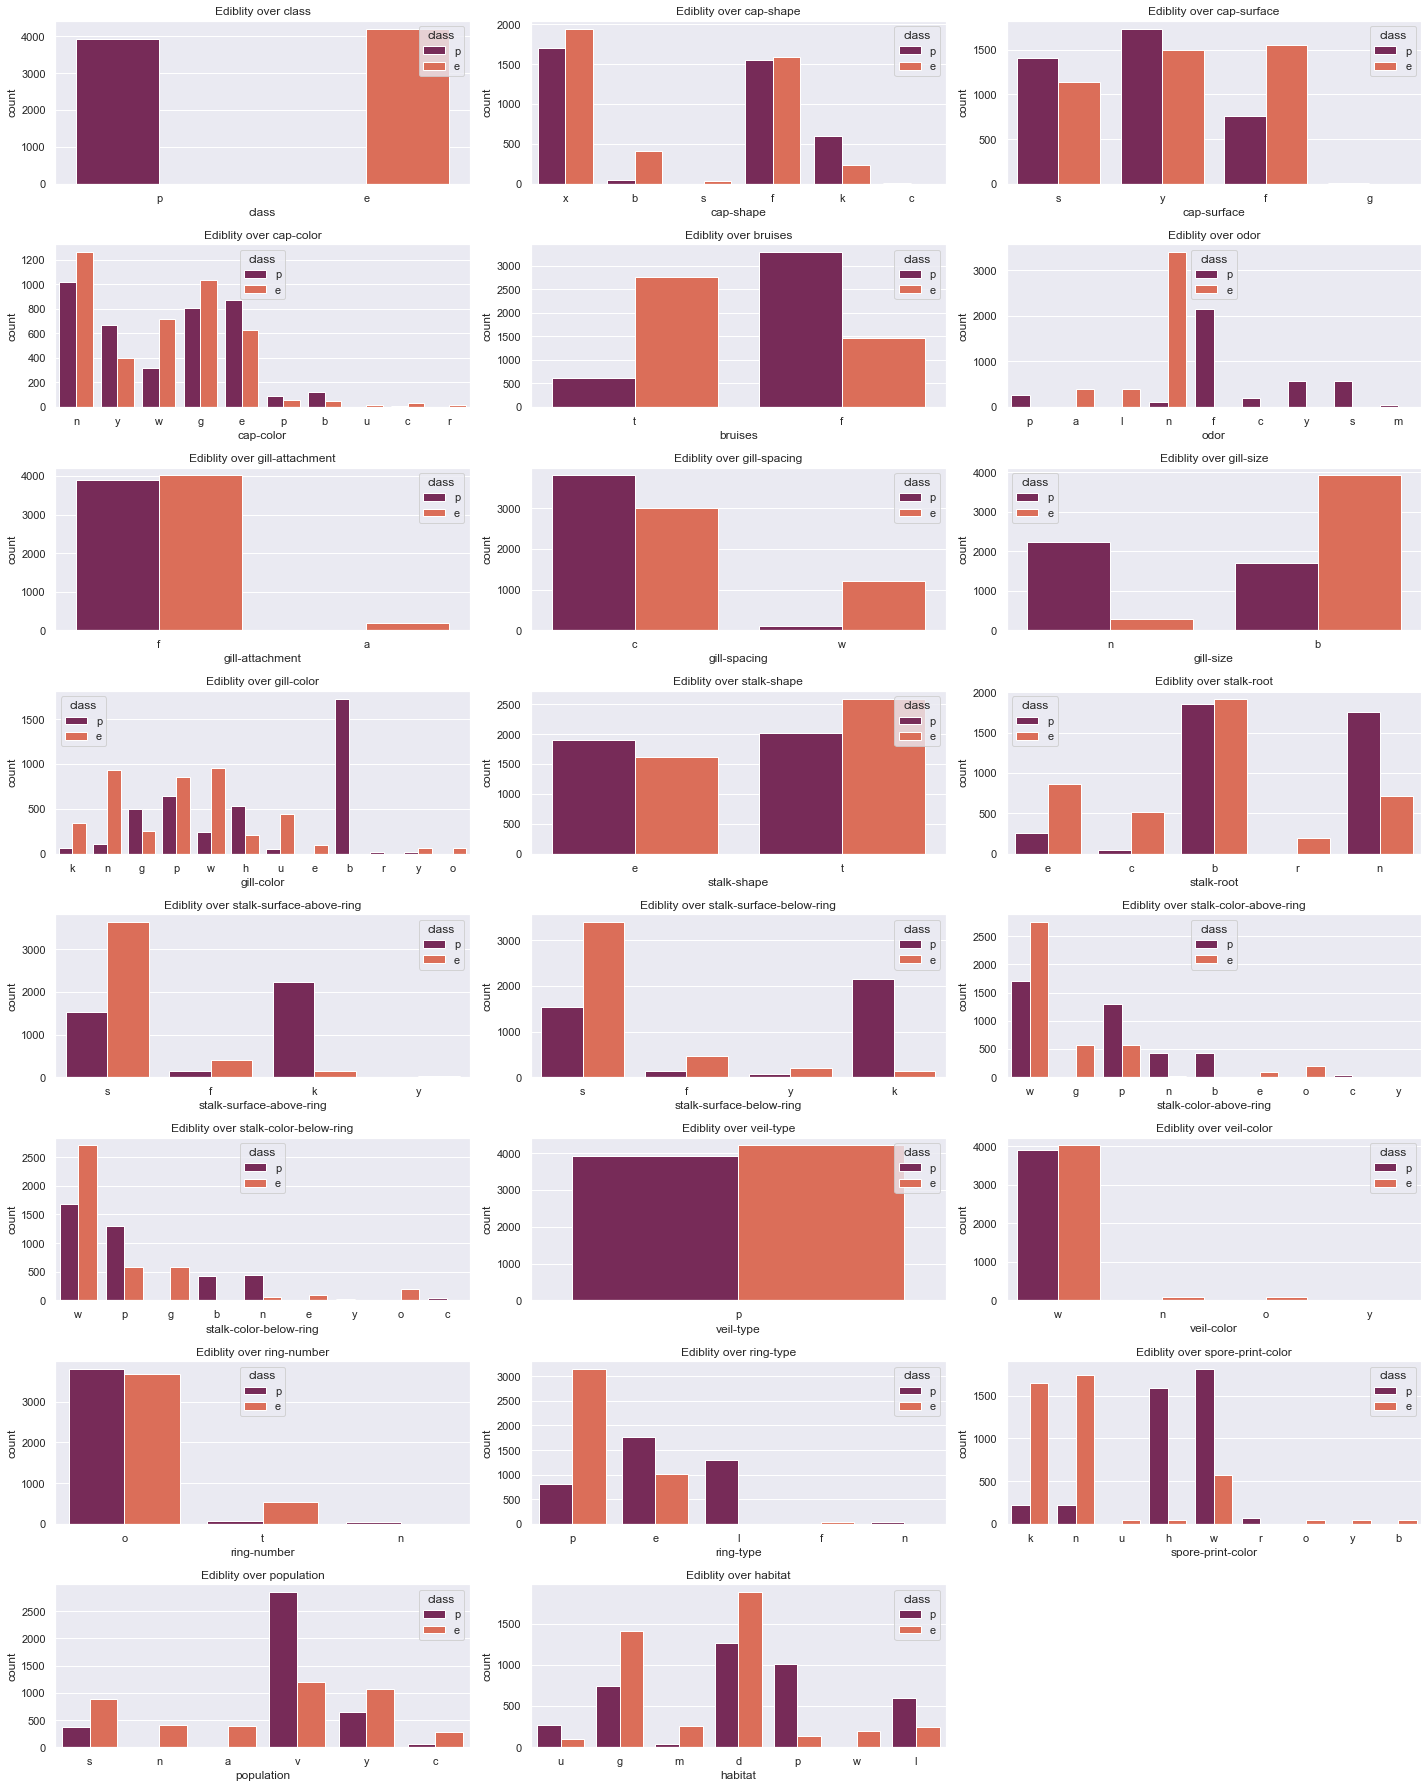

In [13]:
#Multivariate Analysis
#Visualising the distribution of classes 'p' and 'e' over various features
plt.figure(figsize = (20,25), facecolor ='white')
plotnumber=1

for column in mushrooms:
    if plotnumber<=23: 
        ax = plt.subplot(8,3,plotnumber)
        sns.countplot(data = mushrooms, x = column, hue = 'class', palette = 'rocket')
        plt.title('Ediblity over ' + column)
    plotnumber+=1
plt.tight_layout()

We can further conclude that 
- mushrooms of gill color 'b', spore_print_color of 'h'& 'w', population 'v' are highly edible.
- mushrooms of odor 'n' and habitat 'b'and spore_print_color of 'k'& 'n' are highly poisonous

In [14]:
#Splitting data into features and label
X = mushrooms.drop('class',axis=1)
y = mushrooms['class']

In [15]:
# Encoding our label using LabelEncoder p:1 , e:0
# Encoding our features using OneHotEncoder
label_enc = LabelEncoder()
ohe = OneHotEncoder( sparse = False)

In [16]:
# Encoding our label using LabelEncoder p:1 , e:0
#Another approach for encoding class : df['class'] = df['class'].replace({'e':0, 'p':1})
df1 = label_enc.fit_transform(y)
print(pd.Series(df1))

0       1
1       0
2       0
3       1
4       0
       ..
8119    0
8120    0
8121    0
8122    1
8123    0
Length: 8124, dtype: int32


In [17]:
#Changing label in main dataset
mushrooms['class'] = df1
y = mushrooms['class']

In [18]:
#Encoding our features using OneHotEncoder which will increase dimensionality
X_new = ohe.fit_transform(X)

#Converting encoded data into dataframe for further interpretation
X_new = pd.DataFrame(X_new) 
X_new

,0,1,2,3,4,5,6,7,8,9,...,107,108,109,110,111,112,113,114,115,116
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
8120,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
8121,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
8122,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


#### Logistic Regression

In [20]:
#Finding Random state using LogisticRegression
maxAccu=0
maxRS = 0
for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(X_new,y,test_size=0.3,random_state=i)
    LR = LogisticRegression()
    LR.fit(x_train,y_train)
    predlr = LR.predict(x_test)
    acc = accuracy_score(y_test,predlr)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best accuracy is",maxAccu,"on random_state",maxRS)

Best accuracy is 1.0 on random_state 2


<AxesSubplot:title={'center':'Normalized Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

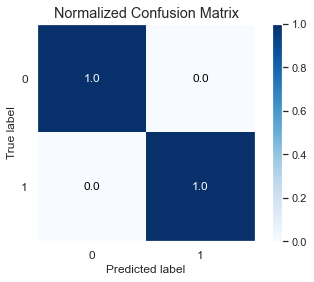

In [21]:
#Plotting Confusion Matrix of Logistic Regression model
skplt.metrics.plot_confusion_matrix(y_test, predlr, normalize=True)

#### Using Principal Component Analysis for Dimensionality Reduction 

In [22]:
#using Standard Scaler to scale our data since PCA can only be applied on scaled data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_new)
pca = PCA()
pca.fit_transform(X_scaled)

array([[-3.28473661e+00,  1.02010486e+00, -1.35359102e+00, ...,
        -2.44030268e-16, -1.71554051e-17,  1.96724900e-18],
       [-3.96948124e+00, -8.56895091e-01,  2.37503078e-01, ...,
        -1.23883178e-15, -4.74811160e-16,  4.13262496e-17],
       [-4.95858617e+00, -2.11112003e-01,  4.66430101e-01, ...,
         6.92906694e-16,  2.48651898e-16,  6.05217500e-17],
       ...,
       [-1.87389543e+00,  8.64938967e+00,  1.45519187e+01, ...,
         1.28194790e-16,  1.15530999e-16, -1.02049875e-17],
       [ 3.63689208e+00,  4.46083644e+00, -2.08311189e+00, ...,
         3.29984248e-17,  2.11939198e-18,  2.27424493e-18],
       [-1.73109707e+00,  9.46850571e+00,  1.62572020e+01, ...,
        -1.88178943e-16, -1.86541724e-16,  4.22172987e-17]])

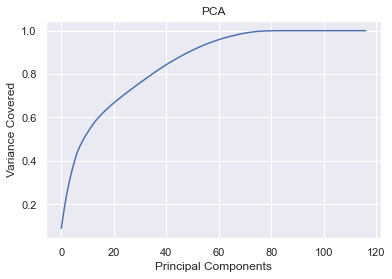

In [23]:
#Plotting dispersion of Principal Component Created by PCA
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel("Principal Components")
plt.ylabel("Variance Covered")
plt.title("PCA")
plt.show()

It is observed that 50 components covers almost 85% of the data

In [24]:
#Using 50 components to train our model to reduce dimensionality
pca = PCA(n_components = 50)
new_comp = pca.fit_transform(X_scaled)
pri_comp = pd.DataFrame(new_comp,columns=['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10','PC11','PC12','PC13','PC14','PC15','PC16','PC17','PC18','PC19','PC20',
                                         'PC21','PC22','PC23','PC24','PC25','PC26','PC27','PC28','PC29','PC30','PC31','PC32','PC33','PC34','PC35','PC36','PC37','PC38','PC39','PC40',
                                         'PC41','PC42','PC43','PC44','PC45','PC46','PC47','PC48','PC49','PC50'])
pri_comp

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC41,PC42,PC43,PC44,PC45,PC46,PC47,PC48,PC49,PC50
0,-3.284737,1.020104,-1.353590,1.361727,-0.478379,-0.486222,-2.988414,-1.085986,-4.907994,4.234096,...,-1.613554,0.361505,0.865254,-0.037873,-0.406135,0.499663,1.297626,1.502650,1.149260,-0.708867
1,-3.969480,-0.856895,0.237502,1.903045,1.281141,-2.193234,-4.367855,-0.493766,0.959790,-1.859142,...,-1.600317,1.088450,0.377912,-0.471159,-0.375307,1.641615,2.384536,1.779346,1.073842,1.329887
2,-4.958586,-0.211114,0.466426,1.557357,1.971419,-3.363299,-5.567682,-0.925804,2.947182,-1.861848,...,0.686024,0.721883,0.067054,0.761574,0.471763,-1.981027,-0.651874,0.762170,-0.103014,-0.667112
3,-3.469968,0.337933,-1.334986,0.881354,-0.008577,-0.638588,-3.126125,-0.874240,-4.493634,4.287652,...,0.997468,0.295845,0.168243,0.609938,-0.219239,-0.973209,-0.719027,-0.098900,0.654477,-0.923723
4,-2.726573,0.889648,-2.051850,4.117679,-2.710544,2.501478,1.354369,0.029293,0.450928,-1.160108,...,-2.887294,0.275839,1.086823,-0.333184,-0.329226,1.802634,0.900049,1.194893,-1.033222,0.325016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,-1.393195,9.999911,16.232499,-0.584964,-4.551462,0.140191,0.335842,0.000912,-0.374900,-0.124083,...,-0.498889,-1.784237,2.676990,-0.125935,-0.779946,-0.058684,-0.790681,-0.635447,-0.314547,0.433904
8120,-1.287643,9.097591,15.370203,-1.154637,-5.643479,0.663993,-0.929788,-0.353519,0.124387,0.533319,...,-0.953651,-2.627822,-0.087468,0.141244,-0.057481,-0.198697,-0.404198,-0.204180,-0.089809,0.389836
8121,-1.873890,8.649385,14.551923,-0.944449,-5.257495,-0.417204,0.414287,-0.474261,-1.059862,-0.621188,...,-0.388720,-0.036062,-0.599504,0.222146,-0.154133,-0.226938,0.128871,1.026556,0.401744,0.156306
8122,3.636890,4.460841,-2.083100,-0.019573,0.249887,-0.448584,-1.140795,0.141463,-0.158538,-0.312798,...,-0.505302,1.411712,1.117432,-1.105638,0.284040,0.077165,-1.405751,-0.854659,1.091529,0.090970


#### Support Vector Classifier


In [25]:
#Finally applying SVC for model analysis
x_train, x_test, y_train, y_test = train_test_split(pri_comp, y,test_size =0.3, random_state = 2)
svc = SVC()
svc.fit(x_train,y_train)
svc.score(x_test,y_test)
predSVC=svc.predict(x_test)
print('Accuracy Score for SVC using PCA is :',round(accuracy_score(y_test,predSVC),4)*100,'% \n')
print('Confusion Matrix of SVC: \n',confusion_matrix(y_test,predSVC), '\n')
print('Classification report: \n',classification_report(y_test,predSVC))

Accuracy Score for SVC using PCA is : 99.92 % 

Confusion Matrix of SVC: 
 [[1298    0]
 [   2 1138]] 

Classification report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1298
           1       1.00      1.00      1.00      1140

    accuracy                           1.00      2438
   macro avg       1.00      1.00      1.00      2438
weighted avg       1.00      1.00      1.00      2438



<AxesSubplot:title={'center':'Normalized Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

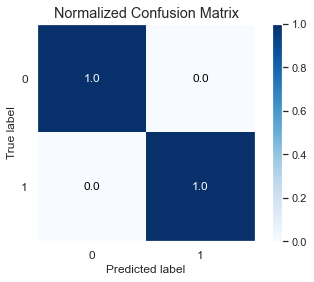

In [26]:
#Plotting Confusion Matrix of Final Decision Tree model
skplt.metrics.plot_confusion_matrix(y_test,predSVC, normalize=True)

### DecisionTree Classifier

In [27]:
#Instantiating Decision Tree model and training it
DT = DecisionTreeClassifier(max_depth = 1)
DT.fit(x_train,y_train)


DecisionTreeClassifier(max_depth=1)

In [28]:
#Model Evaluation 
preddt=DT.predict(x_test)
print('Accuracy Score for Decision Treee is :',round(accuracy_score(y_test,preddt),4)*100,'% \n')
print('Confusion Matrix of Decision Tree: \n',confusion_matrix(y_test,preddt), '\n')
print('Classification Decision Tree: \n',classification_report(y_test,preddt))

Accuracy Score for Decision Treee is : 89.34 % 

Confusion Matrix of Decision Tree: 
 [[1295    3]
 [ 257  883]] 

Classification Decision Tree: 
               precision    recall  f1-score   support

           0       0.83      1.00      0.91      1298
           1       1.00      0.77      0.87      1140

    accuracy                           0.89      2438
   macro avg       0.92      0.89      0.89      2438
weighted avg       0.91      0.89      0.89      2438



<AxesSubplot:title={'center':'Normalized Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

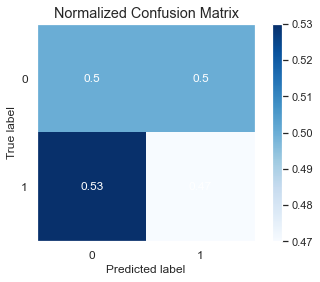

In [29]:
#Plotting Confusion Matrix Decision Tree model
skplt.metrics.plot_confusion_matrix(y_test, predlr, normalize=True)

### Random Forest Classifier

In [30]:
#Model instantiating and training it
RF = RandomForestClassifier(n_estimators=100, max_depth=5)
RF.fit(x_train,y_train)


RandomForestClassifier(max_depth=5)

In [31]:
#Model Evaluation
predrf=RF.predict(x_test)
print('Accuracy Score for Random Forest Classifier is :',round(accuracy_score(y_test,predrf),4)*100,'% \n')
print('Confusion Matrix of Random Forest Classifier : \n',confusion_matrix(y_test,predrf), '\n')
print('Classification Random Forest Classifier : \n',classification_report(y_test,predrf))

Accuracy Score for Random Forest Classifier is : 99.75 % 

Confusion Matrix of Random Forest Classifier : 
 [[1294    4]
 [   2 1138]] 

Classification Random Forest Classifier : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1298
           1       1.00      1.00      1.00      1140

    accuracy                           1.00      2438
   macro avg       1.00      1.00      1.00      2438
weighted avg       1.00      1.00      1.00      2438



<AxesSubplot:title={'center':'Normalized Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

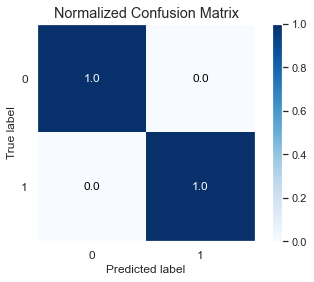

In [32]:
#Plotting Confusion Matrix Decision Tree model
skplt.metrics.plot_confusion_matrix(y_test, predrf, normalize=True)

#### Checking Cross_val_score of all models

In [33]:
#Printing cross_val_scores of all models used so far

scr = cross_val_score(LR,X_new,y,cv = 5 )
print("Cross validation score of Logistic Regression is :", round(scr.mean(),4))

cross_val_SVC = cross_val_score(svc,pri_comp,y,cv = 5 )
print("Cross validation score of SVC is :", round(cross_val_SVC.mean(),4))

Cross_val_score_DT = cross_val_score(DT,X_new,y,cv = 5 )
print("Cross validation score of Decision Tree :", round(Cross_val_score_DT.mean(),4))

Cross_val_score_RF = cross_val_score(RF,X_new,y,cv = 5 )
print("Cross validation score Random Forest Classifier is :",round(Cross_val_score_RF.mean(),4))

Cross validation score of Logistic Regression is : 0.9193
Cross validation score of SVC is : 0.8825
Cross validation score of Decision Tree : 0.8868
Cross validation score Random Forest Classifier is : 0.919


In [34]:
#Creating a Dataframe to check difference between model accuracy and cross_val_score
data = {'Model Accuracy' : [1.00,0.99,0.89,0.989],
                      'Cross-Val-Score': [0.919,0.883,0.886,0.902],
                      '(Model Accuracy) - (Cross-Val-Score)' : [1.00-0.919,0.99-0.883, 0.89 - 0.886, 0.989 - 0.902]}
                      
Model = pd.DataFrame(data,index = ['Logistic Regression','PCA','Decision Tree','Random Forest'])
Model

,Model Accuracy,Cross-Val-Score,(Model Accuracy) - (Cross-Val-Score)
Logistic Regression,1.000,0.919,0.081
PCA,0.990,0.883,0.107
Decision Tree,0.890,0.886,0.004
Random Forest,0.989,0.902,0.087


The above DataFrame shows that there is least difference between model accuracy and cross_val_score of Decision Tree. Hence, Decision Tree is the best model for this dataset.

#### HyperParameter Tuning Decision TR

In [35]:
# Instantiating grid_parameters
grid = {"criterion" : ['gini','entropy'],
       "splitter" : ['random','best'],
       "max_depth" : [1,2,3,4,5],
       "min_samples_split" : [1,2,3,4,5,6],
       "min_samples_leaf" : [1,2,3,4,5,6,7]}

In [36]:
#Instantiating Randomized SearchCV
DT_random = RandomizedSearchCV(estimator = DT, param_distributions = grid, n_iter = 100, cv = 3, verbose=2, random_state=42)

In [37]:
#training our model with tuned hyperparameters
DT_random.fit(x_train,y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits
[CV] END criterion=entropy, max_depth=4, min_samples_leaf=2, min_samples_split=6, splitter=best; total time=   0.0s
[CV] END criterion=entropy, max_depth=4, min_samples_leaf=2, min_samples_split=6, splitter=best; total time=   0.0s
[CV] END criterion=entropy, max_depth=4, min_samples_leaf=2, min_samples_split=6, splitter=best; total time=   0.0s
[CV] END criterion=entropy, max_depth=5, min_samples_leaf=6, min_samples_split=1, splitter=random; total time=   0.0s
[CV] END criterion=entropy, max_depth=5, min_samples_leaf=6, min_samples_split=1, splitter=random; total time=   0.0s
[CV] END criterion=entropy, max_depth=5, min_samples_leaf=6, min_samples_split=1, splitter=random; total time=   0.0s
[CV] END criterion=gini, max_depth=1, min_samples_leaf=3, min_samples_split=4, splitter=random; total time=   0.0s
[CV] END criterion=gini, max_depth=1, min_samples_leaf=3, min_samples_split=4, splitter=random; total time=   0.0s
[CV] 

RandomizedSearchCV(cv=3, estimator=DecisionTreeClassifier(max_depth=1),
                   n_iter=100,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [1, 2, 3, 4, 5],
                                        'min_samples_leaf': [1, 2, 3, 4, 5, 6,
                                                             7],
                                        'min_samples_split': [1, 2, 3, 4, 5, 6],
                                        'splitter': ['random', 'best']},
                   random_state=42, verbose=2)

In [38]:
#To check the best parameters to increase model Accuracy
DT_random.best_params_

{'splitter': 'best',
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_depth': 5,
 'criterion': 'entropy'}

In [39]:
#Instantiating Model with new tuned parameters and training the dataset
DecisionTree = DecisionTreeClassifier(splitter ='best', min_samples_split = 4, min_samples_leaf = 7, max_depth = 5, criterion= 'entropy')
DecisionTree.fit(x_train,y_train)
y_pred_new = DecisionTree.predict(x_test)

In [40]:
y_pred=DecisionTree.predict(x_test)
print('Accuracy Score for Decision Tree is :',round(accuracy_score(y_test,y_pred),4)*100,'% \n')
print('Confusion Matrix of Decision Tree : \n',confusion_matrix(y_test,y_pred), '\n')
print('Classification Random Decision Tree : \n',classification_report(y_test,y_pred))



Accuracy Score for Decision Tree is : 98.89 % 

Confusion Matrix of Decision Tree : 
 [[1289    9]
 [  18 1122]] 

Classification Random Decision Tree : 
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      1298
           1       0.99      0.98      0.99      1140

    accuracy                           0.99      2438
   macro avg       0.99      0.99      0.99      2438
weighted avg       0.99      0.99      0.99      2438



<AxesSubplot:title={'center':'Normalized Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

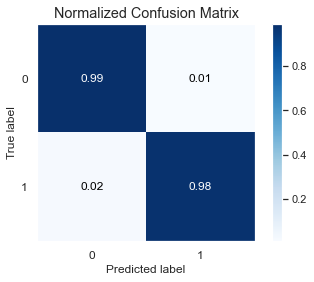

In [41]:
#Plotting Confusion Matrix of Final Decision Tree model
skplt.metrics.plot_confusion_matrix(y_test, y_pred, normalize=True)

Confusion matrix, without normalization
[[1295    3]
 [ 257  883]]
Normalized confusion matrix
[[0.99768875 0.00231125]
 [0.2254386  0.7745614 ]]


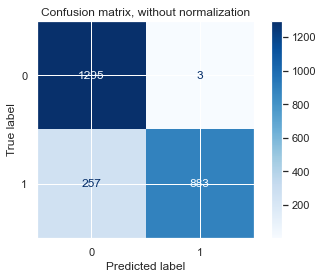

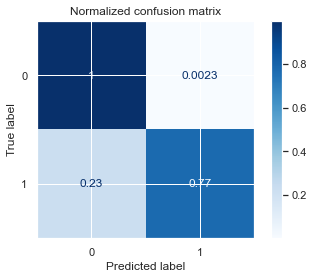

In [43]:
# Plotting both non-normalized and normalized confusion matrix
from sklearn.metrics import plot_confusion_matrix

titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(DT, x_test, y_test,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

#### Saving the Final Model

In [44]:
import joblib
joblib.dump(DecisionTree,"MushroomsAnalysis.pkl")

['MushroomsAnalysis.pkl']

#### Loading Saved Model

In [45]:
model = joblib.load("MushroomsAnalysis.pkl")

In [46]:
#predicting test data using loaded model and saving the results in a dataframe
prediction = model.predict(x_test)
prediction = pd.DataFrame(prediction)


In [47]:
#Converting the saved file into .csv format
prediction.to_csv('Results.csv',index = False)